In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Analysis and Consequent Cleaning of Google Playstore Data from Kaggle

In [71]:
# reading the actual csv file
train = pd.read_csv('googleplaystore.csv')

## Analysis

In [72]:
train.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [73]:
train.shape

(10841, 13)

<AxesSubplot:>

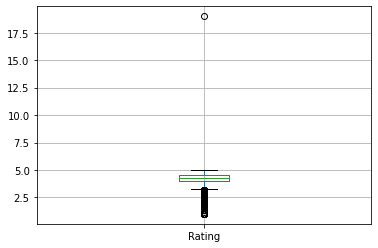

In [74]:
train.boxplot('Rating')

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

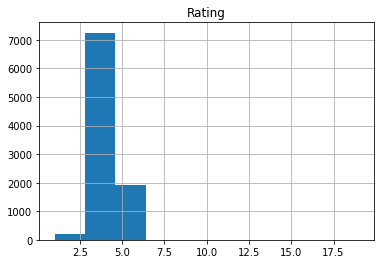

In [75]:
train.hist('Rating')

<Figure size 432x288 with 0 Axes>

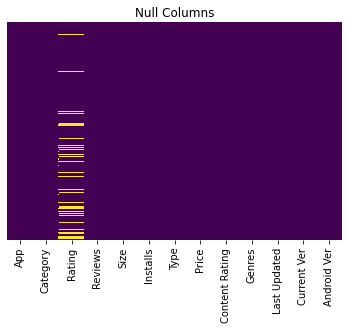

<Figure size 432x288 with 0 Axes>

In [76]:
# making a heat map to see which columns possess null values and how many null values as well
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Null Columns')
plt.figure()

In [77]:
# confirming the fact that that particular column has the null values
train.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [78]:
# counting the number of non null values in each columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [79]:
# counting the exact number of the null values in each column
train.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Cleaning

In [80]:
# now let's have a look at any anomalies in our ratings such as any rating above 5
# since I am changing the acctual dataset in the next code, once you run this again you may not see the anomaly column
train[train['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [81]:
# drop the anomaly
train.drop(labels=10472, axis=0,inplace=True)

<AxesSubplot:>

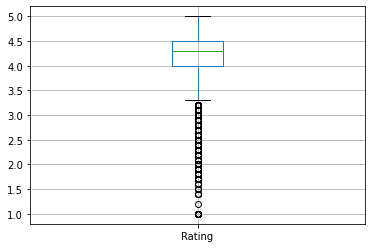

In [82]:
# seeing the significant change in the boxplot once the anomaly is removed (since max value was being affected)
train.boxplot('Rating') 

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

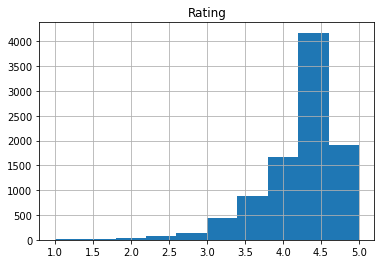

In [83]:
# remarkably, the visualization has on the historgram is so much clearer now too!
train.hist('Rating')

In [84]:
train[train['Rating']>4.7]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
25,Harley Quinn wallpapers HD,ART_AND_DESIGN,4.8,192,6.0M,"10,000+",Free,0,Everyone,Art & Design,"April 25, 2018",1.5,3.0 and up
55,Tickets SDA 2018 and Exam from the State Traff...,AUTO_AND_VEHICLES,4.9,10479,33M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 18, 2018",1.7.1,4.0 and up
61,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,7774,17M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2 and up
64,DMV Permit Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,6090,27M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2 and up
70,Fines of the State Traffic Safety Inspectorate...,AUTO_AND_VEHICLES,4.8,116986,35M,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"August 2, 2018",1.9.7,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,Fr Ignacio Outreach,FAMILY,4.9,52,19M,"1,000+",Free,0,Everyone,Education,"January 19, 2018",1.0,4.4 and up
10810,Fr Lupupa Sermons,BUSINESS,4.8,19,21M,100+,Free,0,Everyone,Business,"June 12, 2018",1.0,4.4 and up
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6M,"1,000+",Free,0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up


In [85]:
# if a column has more null values more than half the length of the dataset, it's useless, so for tha we define a threshold
threshold = train.shape[0]*0.5
print(threshold)

5420.0


In [86]:
train.dropna(thresh = threshold , axis = 1 ,inplace = True)
print(train.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [87]:
# now let's replace the null values in the Ratings column with the mode Rating since the data is not normally distributed
train['Rating'].fillna(value=train['Rating'].median(), inplace=True)
print(train.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64


In [88]:
# we must also replace the null values in the remaining 3 columns
# however, we see that they aren't numerics, so we must use a different type of avergae: the mode
# the mode for the three columns are here
print(train['Type'].mode())
print(train['Current Ver'].mode())
print(train['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [89]:
# creating function to replace the null values in the columns with the mode
def fill_null_values_with_mode(column):
    train[column].fillna(value=train[column].mode()[0], inplace=True)

In [90]:
# applying the above function on the appropriate columns
fill_null_values_with_mode('Type')
fill_null_values_with_mode('Current Ver')
fill_null_values_with_mode('Android Ver')
print(train.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

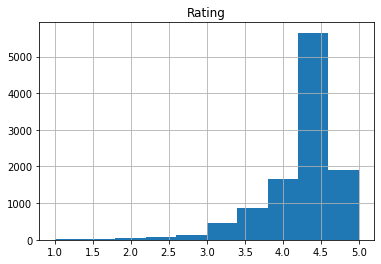

In [91]:
# Now since we have replaced all the null values, let's have a look at the historgram again
train.hist('Rating')

In [92]:
train[train['Type']!= 'Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,4.3,17,157k,100+,Paid,$0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,"1,000+",Paid,$7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11M,"10,000+",Paid,$16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up
10785,"sugar, sugar",FAMILY,4.2,1405,9.5M,"10,000+",Paid,$1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up


In [93]:
# now let's try to remove the $ sign from the Price column incase we want to do computations on it which maybe affected
train['Price'] = train['Price'].apply(lambda price: price.replace('$', '') if '$' in price else price)
train['Price'] = train['Price'].apply(lambda price: float(price))

In [94]:
train[train['Type']!= 'Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,4.3,17,157k,100+,Paid,0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,"1,000+",Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11M,"10,000+",Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up
10785,"sugar, sugar",FAMILY,4.2,1405,9.5M,"10,000+",Paid,1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up


In [95]:
# let's have a look at the Revviews column and see if it has any non numeric values, if it does, we will print an error

try:
    train['Reviews'] = pd.to_numeric(train['Reviews'], errors='raise')
except:
    print('Null values exist in Reviews')

In [96]:
train['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10840, dtype: int64

In [97]:
# let's also remove the commas and additon signs from the Installs column incase computations are required
train['Installs'] = train['Installs'].apply(lambda installs: installs.replace(',', '') if ',' in installs else installs)
train['Installs'] = train['Installs'].apply(lambda installs: installs.replace('+', '') if '+' in installs else installs)

train['Installs'] = train['Installs'].apply(lambda installs: float(installs))

In [98]:
train[train['Type']!= 'Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000.0,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000.0,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000.0,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000.0,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000.0,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,4.3,17,157k,100.0,Paid,0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,1000.0,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11M,10000.0,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up
10785,"sugar, sugar",FAMILY,4.2,1405,9.5M,10000.0,Paid,1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up


In [99]:
# since we have removed all the unwanted symbols in the numerical data, we can apply statistical measures to our dataset
train.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


## Data Visualization

In [100]:
# grouping the data according to the different categories
categorize = train.groupby('Category')

# calculating the mean rating and reviews as well as profit from each category
average_rating = categorize['Rating'].mean()
average_reviews = categorize['Reviews'].mean()
total_profit = categorize['Price'].sum()

print('Average Rating of each {}\nAverage Reviews of each {}\nTotal Profit of each {}'.format
     (average_rating, average_reviews, total_profit))

Average Rating of each Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_A

Text(0, 0.5, 'Ratings')

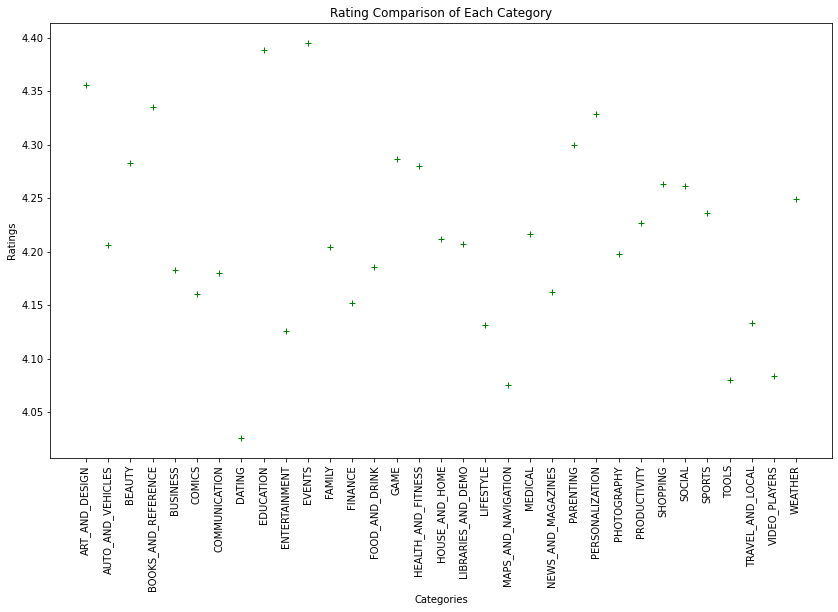

In [101]:
plt.figure(figsize = (14 , 8))
plt.plot(average_rating, '+', color = 'g')
plt.xticks(rotation = 90)
plt.title("Rating Comparison of Each Category")
plt.xlabel("Categories")
plt.ylabel("Ratings")

Text(0, 0.5, 'Reviews')

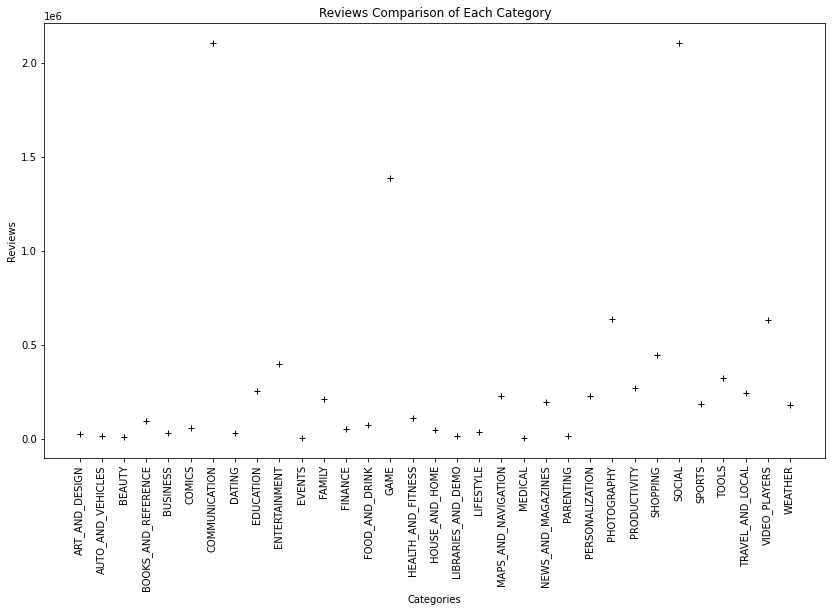

In [102]:
plt.figure(figsize = (14 , 8))
plt.plot(average_reviews, '+', color = 'k')
plt.xticks(rotation = 90)
plt.title("Reviews Comparison of Each Category")
plt.xlabel("Categories")
plt.ylabel("Reviews")

Text(0, 0.5, 'Profit')

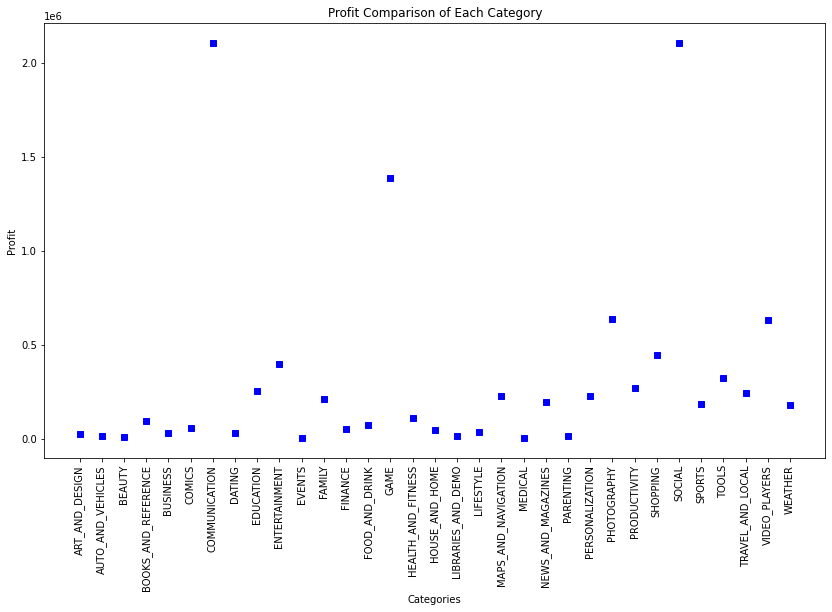

In [103]:
plt.figure(figsize = (14 , 8))
plt.plot(average_reviews, 's', color = 'b')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.title("Profit Comparison of Each Category")
plt.xlabel("Categories")
plt.ylabel("Profit")